In [7]:
%matplotlib inline 
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm_notebook as tqdm
sns.set()

In [8]:
df = pd.read_csv("raw_data.csv", sep=";")
df.head()

,patient_name,cell_name,cell_type,patient_state,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
0,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,...,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163,3.0
1,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,72.367814,70.946072,73.946121,69.342146,66.510280,51.961781,...,329.497317,330.293120,334.239066,336.958602,332.810752,337.041213,329.390541,317.220241,289.615842,2.0
2,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,36.107124,50.509171,61.251275,60.634079,59.005082,43.374480,...,349.773008,362.963878,377.543505,369.898047,347.525042,324.241500,304.862554,313.958545,356.180451,1.0
3,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,75.073652,57.880571,53.339291,47.543917,51.896103,40.910901,...,316.498420,323.193044,321.317859,310.282294,326.497336,339.002563,345.054206,372.404114,414.603390,2.0
4,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,51.591270,54.161436,63.649577,58.364222,61.095665,47.811723,...,324.027328,320.147621,318.339477,310.159782,313.315257,333.873758,339.270424,352.541981,351.914705,1.0


In [9]:
df["patient_state"] = df['patient_state'].map({'malade':1,'sain':0})
df

,patient_name,cell_name,cell_type,patient_state,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
0,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,1,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,...,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163,3.0
1,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,1,72.367814,70.946072,73.946121,69.342146,66.510280,51.961781,...,329.497317,330.293120,334.239066,336.958602,332.810752,337.041213,329.390541,317.220241,289.615842,2.0
2,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,1,36.107124,50.509171,61.251275,60.634079,59.005082,43.374480,...,349.773008,362.963878,377.543505,369.898047,347.525042,324.241500,304.862554,313.958545,356.180451,1.0
3,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,1,75.073652,57.880571,53.339291,47.543917,51.896103,40.910901,...,316.498420,323.193044,321.317859,310.282294,326.497336,339.002563,345.054206,372.404114,414.603390,2.0
4,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,1,51.591270,54.161436,63.649577,58.364222,61.095665,47.811723,...,324.027328,320.147621,318.339477,310.159782,313.315257,333.873758,339.270424,352.541981,351.914705,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,P1_ULC156,P1_ULC156_M1_L1_ROI2_C43,TNK,0,79.899533,106.561057,113.545793,116.775563,108.161449,96.394401,...,353.242721,342.554395,338.234888,349.217179,354.196203,357.833444,369.658252,378.589869,394.833234,3.0
7193,P1_ULC156,P1_ULC156_M1_L1_ROI2_C43,TNK,0,86.579106,64.318268,53.031208,60.351759,73.065302,72.644425,...,336.118073,345.712805,338.797810,339.772543,345.702042,353.963123,356.027565,351.790370,342.570314,1.0
7194,P1_ULC156,P1_ULC156_M1_L1_ROI2_C44,B,0,86.193622,67.082583,62.158704,66.058526,76.819090,76.931321,...,340.361834,348.195007,342.144712,357.687618,361.788879,362.309974,358.883856,355.593313,357.331293,1.0
7195,P1_ULC156,P1_ULC156_M1_L1_ROI2_C44,B,0,89.962557,89.573056,90.300399,93.353796,96.570792,104.798885,...,370.213484,370.174949,373.407591,379.524429,382.040521,376.632795,377.164771,366.349519,363.434051,2.0


<AxesSubplot:xlabel='cell_type', ylabel='patient_state'>

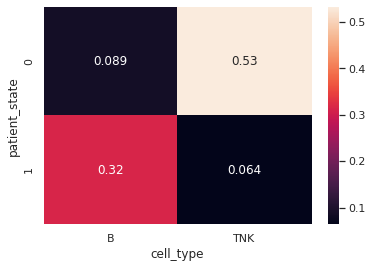

In [10]:
crosstab_ptable = pd.crosstab(df["patient_state"], df["cell_type"], normalize=True)
sns.heatmap(crosstab_ptable, annot=True )

In [52]:
des = df.describe()
des

,patient_state,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
count,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,...,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,0.379464,60.124829,60.463136,59.888256,60.904055,63.627305,57.514653,65.687469,75.424163,91.773647,...,329.839983,334.002681,332.861314,335.071753,336.623990,339.733173,339.436016,339.784133,341.260542,1.950118
std,0.485287,19.976995,17.268393,17.920853,16.415824,13.919297,17.249238,15.680804,15.217780,14.174618,...,27.831428,27.430182,27.728478,27.978240,28.926671,29.264895,31.442279,31.467506,36.484886,0.813236
min,0.000000,-12.995530,8.440945,1.530354,5.717389,20.313871,11.445971,14.353926,30.274836,47.596634,...,200.871285,185.342734,179.166929,181.075762,171.396883,180.273545,175.537804,189.114613,162.011435,1.000000
25%,0.000000,46.904888,48.421237,47.690901,49.568899,54.488445,46.118824,54.751660,65.171660,82.026095,...,316.236211,321.961672,320.887548,322.333581,323.538601,327.182426,323.778776,325.371976,324.208602,1.000000
50%,0.000000,58.989268,59.228337,58.161755,58.895818,61.911697,55.175128,64.270404,73.845304,90.814998,...,335.135554,339.762888,338.850255,341.245106,342.813211,346.884805,345.883146,346.401326,346.924912,2.000000
75%,1.000000,71.682981,70.038529,69.733277,69.865094,70.779618,66.286946,74.490685,84.470709,100.256779,...,348.943557,352.548370,351.567056,354.435843,357.432078,360.816672,362.636769,361.816652,365.543180,3.000000
max,1.000000,154.161658,168.810197,167.825665,171.197853,160.204620,165.600060,159.633693,158.330256,158.999332,...,406.445658,401.881794,408.206418,415.210829,414.584479,423.749905,434.973547,423.668719,445.906239,3.000000


In [136]:
X_train.shape

(6477, 999)

In [140]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X_train)

df_subset = pd.DataFrame(columns = ['tsne-2d-one', 'tsne-2d-two','label']) 
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['label'] = y_train
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full")


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6477 samples in 0.662s...
[t-SNE] Computed neighbors for 6477 samples in 52.186s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6477
[t-SNE] Computed conditional probabilities for sample 2000 / 6477
[t-SNE] Computed conditional probabilities for sample 3000 / 6477
[t-SNE] Computed conditional probabilities for sample 4000 / 6477
[t-SNE] Computed conditional probabilities for sample 5000 / 6477
[t-SNE] Computed conditional probabilities for sample 6000 / 6477
[t-SNE] Computed conditional probabilities for sample 6477 / 6477
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.425194
[t-SNE] KL divergence after 1000 iterations: 1.619349


ValueError: The palette list has the wrong number of colors.

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

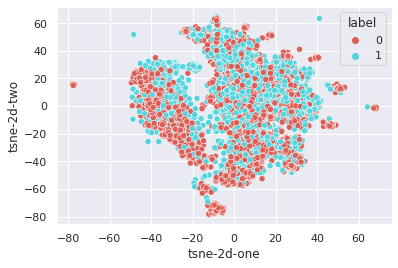

In [141]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full")


7197
23.271295072399997
53.674432653400004


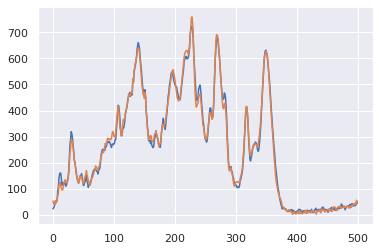

In [134]:
import random
print(df.shape[0])
samples,_ = get_data(df, random.sample(range(0, df.shape[0]), 2))
for sample in samples:
    print((sample[0]))
    sns.lineplot(x=range(500), y=sample[0:500])
    

/home/adrien/miniconda3/envs/quinten/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='mean'>

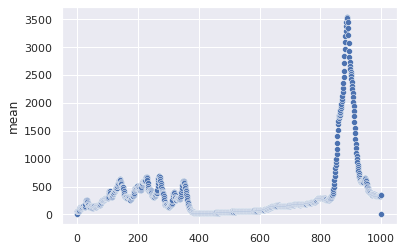

In [56]:
sns.scatterplot(range(1001), des.iloc[1])

In [65]:
df["cell_type"].value_counts()

TNK    4289
B      2908
Name: cell_type, dtype: int64

<AxesSubplot:xlabel='spectre', ylabel='Count'>

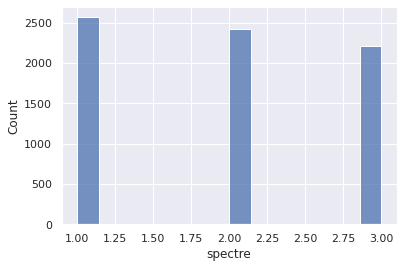

In [129]:
sns.histplot(data=df, x="spectre")


patient_name
cell_name
cell_type
patient_state


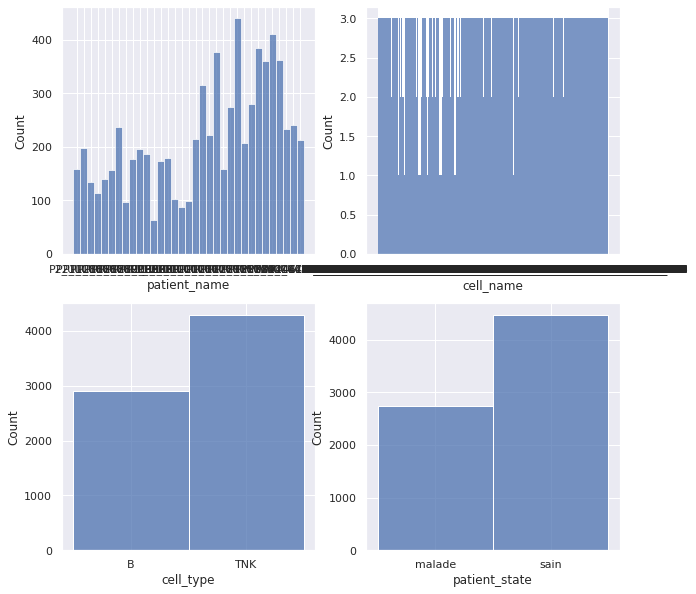

In [36]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

for ax, element in zip(axes.flat, df.select_dtypes(exclude=np.number).columns):
    print(element)
    sns.histplot(data=df, x=element, ax=ax)

plt.show()

## Feature selection

In [47]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [51]:
upper

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
lambda_1,NaN,0.739673,0.477022,0.386352,0.384338,0.449180,0.476160,0.496281,0.447998,0.385411,...,0.008593,0.028510,0.006082,0.017026,0.016624,0.036278,0.008004,0.002340,0.000530,0.004529
lambda_2,NaN,NaN,0.928063,0.847514,0.698382,0.664669,0.611528,0.607982,0.537261,0.504496,...,0.079943,0.029248,0.061170,0.044521,0.043064,0.004811,0.046866,0.056763,0.060708,0.001255
lambda_3,NaN,NaN,NaN,0.959768,0.811323,0.720421,0.632319,0.602948,0.517897,0.498918,...,0.064895,0.013897,0.045134,0.031289,0.030356,0.007456,0.037317,0.047219,0.049509,0.011168
lambda_4,NaN,NaN,NaN,NaN,0.926711,0.811161,0.717321,0.650645,0.525789,0.463039,...,0.102044,0.045132,0.075040,0.064364,0.067133,0.032136,0.081110,0.091173,0.086113,0.004186
lambda_5,NaN,NaN,NaN,NaN,NaN,0.887510,0.817866,0.713258,0.554163,0.437889,...,0.080619,0.025745,0.052210,0.044442,0.054129,0.029490,0.075162,0.083857,0.074344,0.002985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lambda_996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.978362,0.922191,0.694432,0.076881
lambda_997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966096,0.739981,0.074972
lambda_998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877956,0.075724
lambda_999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067580


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

/home/adrien/miniconda3/envs/quinten/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/adrien/miniconda3/envs/quinten/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

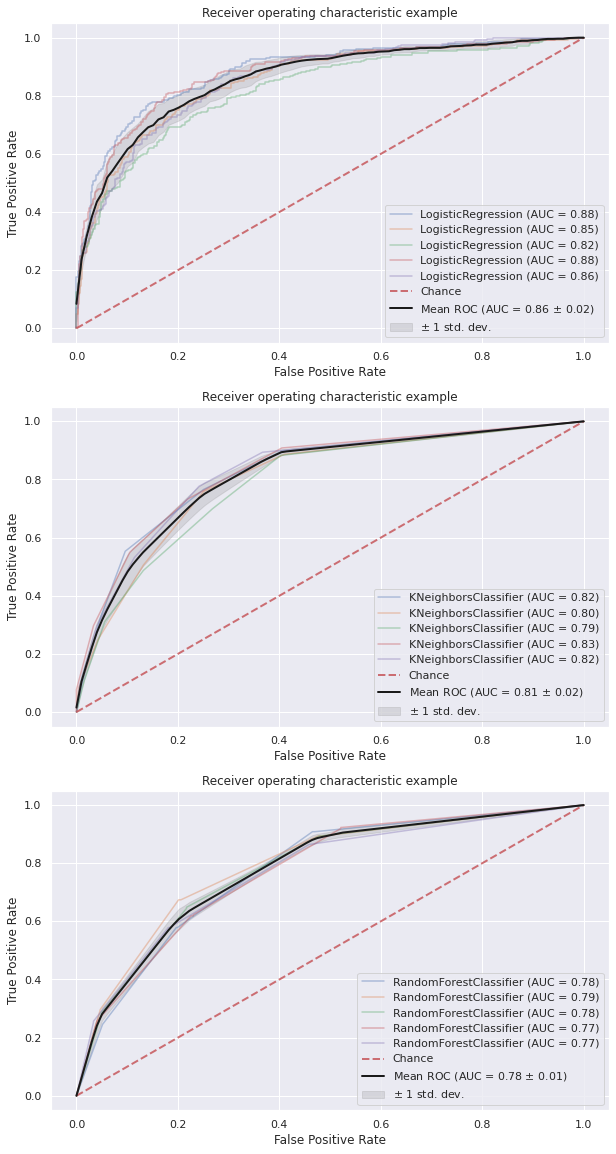

In [113]:



#TODO Check the stratify, ADD unit test to check data distrib

def get_data(df1, row=[], col=["patient_state","cell_type","patient_name","cell_name"]):
    #TODO deal with cell type
    
    "Return selected row data in numpy format"
    df2 = df1.copy()   
    df2 = df2.drop(col, axis=1)   
    X = df2.select_dtypes(include=np.number).iloc[row,:-1].to_numpy() #exclude spectrum index

    y = df1["patient_state"].iloc[row].to_numpy()
    return X, y

def split_train_val_test(df, test_size=0.2):
    "Split in train test validation set given some percentage"
    
    train, test = train_test_split(df, test_size=test_size)
    train, val = train_test_split(train, test_size=0.2)

    return train, val, test

def standardize(X_train, X_test, X_val=None):
    
    scaler_train = StandardScaler() 
    scaler_test = StandardScaler() 
    X_val_normalized = None 
    
    if X_val is not None:
        scaler_val = StandardScaler() 
        X_val_normalized = scaler_val.fit_transform(X_val)
        
    ####
    #Test here make sure mean var are closed 
    ####
    return scaler_train.fit_transform(X_train), scaler_train.fit_transform(X_test), X_val_normalized

def train(X_train, y_train, model):
    
    return model.fit(X_train, y_train)

    
def test(X_test, y_test, model):
    
    return model.score(X_test, y_test)


#TODO FACTORIZE TO HAVE A USABLE TRAIN TEST FUNC WITH JUST(Xtrain, ytreain, xtest ytest)

def train_test(X_train, y_train, X_test, y_test, clf, ax, return_prediction=0):
    mean_fpr = np.linspace(0, 1, 100)
    y_predict = None 
    train(X_train, y_train, clf)
    score = test(X_test, y_test, clf)
    if return_prediction:
        y_predict = clf.predict(X_test)
    viz = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=.4)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)

    
    return score, interp_tpr, viz.roc_auc ,y_predict  

def plot_roc(ax, tprs, aucs):
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='k',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=1)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    

def multi_train(df):
    #remap label
    seed = 42
    n_splits = 5
    fig, axes = plt.subplots(3, figsize=(10,20))
    dict_clfs = {"LR": [[],[],0],"KNN":[[],[],0],"RF": [[],[],0]}
    sss = StratifiedShuffleSplit(n_splits=n_splits, random_state=seed)

    for train_index, test_index in sss.split(df.loc[:, df.columns != 'patient_state'], df["patient_state"]):
        
        clf_dict = {"LR": LogisticRegression(random_state=0, max_iter=500),
                    "KNN": KNeighborsClassifier(metric="cosine"),
                    "RF": RandomForestClassifier(n_estimators=3, max_depth=50)}
        
        X_train, y_train = get_data(df, train_index)
        X_test, y_test = get_data(df, test_index)
        
        for i, (key, clf) in enumerate(clf_dict.items()): 

            split_score, tpr, auc, y_pred = train_test(X_train, y_train, X_test, y_test, clf, axes[i], return_prediction=True)
            dict_clfs[key][0].append(tpr)
            dict_clfs[key][1].append(auc)
            dict_clfs[key][2] += split_score

            #print(classification_report(y_test, y_pred))
    for ax, i  in zip(axes, dict_clfs):
        plot_roc(ax, dict_clfs[i][0], dict_clfs[i][1])

    #[print("Score is {0}".format(score/n_splits)) for score in score_dict.values()]
    
    
    
    return X_train, y_train, X_test, y_test
        
    
class TrainingScenario:
    def __init__(self, config, df):
        self.df = df 
        self.config = config


X_train, y_train, X_test, y_test = multi_train(df)




(6477, 250) (720, 250)


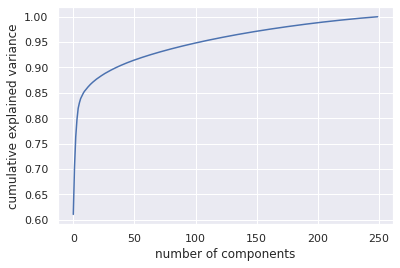

In [68]:
from sklearn.decomposition import PCA

n_components = 250

pca = PCA(n_components).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

sns.lineplot(x=range(n_components), y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(X_train.shape, X_test.shape)

In [73]:
clf_dict = {"LR": LogisticRegression(random_state=0), "KNN": KNeighborsClassifier(metric="cosine"), "GB":GradientBoostingClassifier() }  
for clf in clf_dict.values():
    print(X_train.shape, X_test.shape)
    train(X_train, y_train, clf)
    print(test(X_test, y_test, clf))

(6477, 250) (720, 250)


/home/adrien/miniconda3/envs/quinten/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.775
(6477, 250) (720, 250)
0.7888888888888889
(6477, 250) (720, 250)
0.8194444444444444


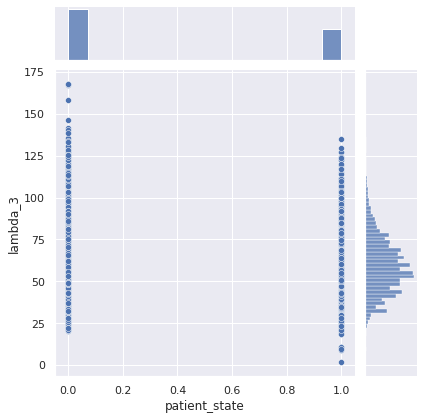

In [176]:
sns.jointplot(data=df, x="patient_state", y="lambda_3")

In [86]:
from utils import hello_world
hello_world()

hello world
